# Data generation

Let's generate some data for Lotka-Volterra equations, with a control channel. We assume that the control is exerted through an actuator, the function allows to specify the strength of the actuator (act) and a function of x (ctr), adding act * ctr(x) to one of the variables. The values returned are:
- the sequence x, ctr
- the starting y
- the final y
- the list of ys

The size of the step can be specified so as to make the simulation converge, and granularity is specified so as to have only the entries every X steps.

In [8]:
from random import shuffle
def generate_lotka_volterra(x_start, y_start, alpha, beta, gamma, delta, act, ctr, step, n, granularity):
    ret = []
    x = x_start
    y = y_start
    ret.append([x, act * ctr(x)])
    t = step
    i = 1
    ys = [y_start]
    possible_ips = list(range(1, n-1))
    shuffle(possible_ips)
    ips = possible_ips[:2]
    print("Possible ips", ips)
    while t < n:
        x_dot = x * (alpha - beta * y) + act * ctr(x)
        y_dot = y * (delta * x - gamma) 
        x += x_dot * step
        y += y_dot * step
        if (i % granularity == 0):
            ret.append([x, act * ctr(x)])
            ys.append(y)
        t += step
        i += 1
    return ret, y_start, y, ys, ips

We generate different values by setting different starting xs (here I'm using xs for the internal channel values, those are the ys that are not sparse in the problem definition), different ys (y_sparse in the problem definition) and strengths of the actuator, setting the control function to be sqrt(x).

Introducing a sanity check (as to make sure simulation goes ok for max and min values). Save data to files as to be retrieve by the training program.

In [10]:
import numpy as np

possible_xs = np.linspace(0, 20, 2000)
possible_ys = np.linspace(0, 20, 2000)
possible_acts = np.linspace(0, 2, 11)

output_dir = '/home/sergio/plz/examples/data/de_nns'

import os

def generate_set(kind, size):
    data = []
    starts = []
    ends = []
    yss = []
    ipss = []
    for i in range(0, size):
        vals, start, end, ys, ips = generate_lotka_volterra(
            x_start=np.random.choice(possible_xs),
            y_start=np.random.choice(possible_ys),
            alpha=0.1, beta=0.02, gamma=0.4, delta=0.02,
            act=np.random.choice(possible_acts),
            ctr=lambda x: x**(1/2),
            step=0.1,
            n=80,
            granularity=10)
    
        if min(v[0] for v in vals) < 0:
            print(f"{i}: Rejecting because of internal with min {min(v[0] for v in vals)}")
            continue
        if max(v[0] for v in vals) > 500:
            print(f"{i}: Rejecting because of internal with max {max(v[0] for v in vals)}")
            continue
        if end < 0 or end > 500:
            print(f"{i}: Rejecting because of sparse with {end}")
            continue

        data.append(vals)
        starts.append(start)
        ends.append(end)
        yss.append(ys)
        ipss.append(ips)   


    with open(os.path.join(output_dir, kind + ".npy"), 'wb') as f:
         np.save(f, data)
    
    with open(os.path.join(output_dir, kind + "_starts.npy"), 'wb') as f:
         np.save(f, starts)
        
    with open(os.path.join(output_dir, kind + "_ends.npy"), 'wb') as f:
         np.save(f, ends)
    
    with open(os.path.join(output_dir, kind + "_ys.npy"), 'wb') as f:
         np.save(f, yss)
            
    with open(os.path.join(output_dir, kind + "_ips.npy"), 'wb') as f:
         np.save(f, ipss)
    
    return (data, starts, ends, yss, ipss)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

Generate training and test data

In [12]:
training_data, training_starts, training_ends, training_ys, training_ips = generate_set('training', 1000)

Possible ips [29, 77]
Possible ips [27, 30]
Possible ips [3, 29]
Possible ips [70, 17]
Possible ips [61, 12]
Possible ips [75, 74]
Possible ips [67, 37]
Possible ips [43, 30]
Possible ips [49, 31]
Possible ips [68, 25]
Possible ips [6, 25]
Possible ips [41, 36]
Possible ips [53, 47]
Possible ips [32, 70]
Possible ips [59, 16]
Possible ips [70, 26]
Possible ips [19, 42]
Possible ips [38, 64]
Possible ips [67, 62]
Possible ips [76, 12]
Possible ips [55, 47]
Possible ips [26, 2]
Possible ips [76, 44]
Possible ips [67, 16]
Possible ips [32, 69]
Possible ips [31, 54]
Possible ips [11, 54]
Possible ips [61, 8]
Possible ips [36, 27]
Possible ips [62, 13]
Possible ips [60, 57]
Possible ips [21, 2]
Possible ips [48, 52]
Possible ips [65, 45]
Possible ips [15, 53]
Possible ips [21, 1]
Possible ips [68, 22]
Possible ips [7, 26]
Possible ips [42, 76]
Possible ips [69, 4]
Possible ips [14, 10]
Possible ips [35, 7]
Possible ips [40, 49]
Possible ips [34, 44]
Possible ips [57, 77]
Possible ips [58, 5

Possible ips [23, 58]
Possible ips [59, 47]
Possible ips [51, 54]
Possible ips [46, 27]
Possible ips [21, 12]
Possible ips [77, 49]
Possible ips [14, 2]
Possible ips [75, 68]
Possible ips [43, 57]
Possible ips [42, 8]
Possible ips [10, 51]
Possible ips [49, 56]
Possible ips [71, 11]
Possible ips [19, 4]
Possible ips [71, 7]
Possible ips [23, 33]
Possible ips [3, 24]
Possible ips [40, 49]
Possible ips [12, 67]
Possible ips [49, 16]
Possible ips [67, 35]
Possible ips [65, 13]
Possible ips [25, 23]
Possible ips [14, 65]
Possible ips [19, 33]
Possible ips [15, 25]
Possible ips [19, 67]
Possible ips [24, 61]
Possible ips [43, 37]
Possible ips [3, 55]
Possible ips [42, 32]
Possible ips [66, 1]
Possible ips [32, 61]
Possible ips [66, 56]
Possible ips [19, 30]
Possible ips [26, 59]
Possible ips [33, 74]
Possible ips [18, 35]
Possible ips [37, 68]
Possible ips [53, 68]
Possible ips [77, 33]
Possible ips [50, 48]
Possible ips [75, 57]
Possible ips [47, 13]
Possible ips [56, 76]
Possible ips [34,

Possible ips [47, 34]
Possible ips [31, 6]
Possible ips [47, 41]
Possible ips [38, 32]
Possible ips [15, 5]
Possible ips [61, 14]
Possible ips [31, 60]
Possible ips [75, 2]
Possible ips [47, 48]
Possible ips [63, 48]
Possible ips [15, 41]
Possible ips [9, 6]
Possible ips [71, 3]
Possible ips [1, 30]
Possible ips [58, 29]
Possible ips [24, 8]
Possible ips [27, 36]
Possible ips [15, 70]
Possible ips [11, 13]
Possible ips [23, 57]
Possible ips [60, 20]
Possible ips [27, 52]
Possible ips [37, 35]
Possible ips [63, 51]
Possible ips [35, 21]
Possible ips [17, 44]
Possible ips [50, 16]
Possible ips [47, 63]
Possible ips [2, 36]
Possible ips [8, 59]
Possible ips [64, 1]
Possible ips [58, 34]
Possible ips [7, 33]
Possible ips [37, 8]
Possible ips [24, 68]
Possible ips [52, 10]
Possible ips [32, 57]
Possible ips [45, 59]
Possible ips [51, 25]
Possible ips [40, 70]
Possible ips [30, 22]
Possible ips [25, 56]
Possible ips [59, 76]
Possible ips [58, 23]
Possible ips [11, 46]
Possible ips [13, 33]
P

In [13]:
eval_data, eval_starts, eval_ends, eval_ys, eval_ips = generate_set('eval', 100)

Possible ips [52, 75]
Possible ips [74, 14]
Possible ips [32, 76]
Possible ips [76, 14]
Possible ips [42, 39]
Possible ips [57, 35]
Possible ips [16, 36]
Possible ips [21, 53]
Possible ips [55, 26]
Possible ips [78, 7]
Possible ips [43, 28]
Possible ips [24, 22]
Possible ips [33, 19]
Possible ips [19, 73]
Possible ips [70, 19]
Possible ips [20, 10]
Possible ips [56, 68]
Possible ips [65, 26]
Possible ips [43, 64]
Possible ips [23, 60]
Possible ips [4, 58]
Possible ips [36, 32]
Possible ips [78, 25]
Possible ips [27, 73]
Possible ips [25, 45]
Possible ips [13, 24]
Possible ips [5, 21]
Possible ips [48, 61]
Possible ips [64, 22]
Possible ips [12, 7]
Possible ips [74, 4]
Possible ips [6, 75]
Possible ips [35, 63]
Possible ips [49, 53]
Possible ips [11, 6]
Possible ips [50, 35]
Possible ips [38, 74]
Possible ips [44, 52]
Possible ips [21, 44]
Possible ips [3, 52]
Possible ips [66, 70]
Possible ips [60, 3]
Possible ips [39, 23]
Possible ips [39, 28]
Possible ips [42, 52]
Possible ips [21, 3

Sanity check, get one sample and plot it as to see if it makes sense

In [ ]:
import matplotlib.pyplot as plt

t = np.linspace(0, 80, 81)

sample = 273

plt.plot(t, np.array([x[0] for x in training_data[sample]]), 'o', color='black');
plt.plot(t, np.array([x[1] for x in training_data[sample]]), 'o', color='red');
plt.plot(t, np.array(training_ys[sample]), 'o', color='green');
plt.plot([0], [training_starts[sample]], 'o', color='blue')
plt.plot([80], [training_ends[sample]], 'o', color='yellow')
for p in training_ips[sample]:
    plt.plot(np.array([p]), np.array([training_ys[sample][p]]), 'o', color='cyan')

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Model evaluation

In [18]:
timeline = np.array([[-1] * 3]*80)

Class for the model, copy-pasted from the training code (not ideal, but didn't want to mess with import paths, etc.)

In [19]:
FINAL_TIME = 80
OBSERVABLE_VARIABLES = 2
class NNModel(nn.Module):
    def __init__(self):
        super().__init__()
        input_dimension = FINAL_TIME * (OBSERVABLE_VARIABLES + 1)
        self.linear1 = nn.Linear(input_dimension, input_dimension*2)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(input_dimension*2, 100)
        self.relu2 = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
        self.linear3 = nn.Linear(100, 1)
        self.data = None
        self.optimizer = optim.Adagrad(self.parameters(), lr=0.00001, weight_decay=10)
        self.timeline = torch.ones([FINAL_TIME, OBSERVABLE_VARIABLES+1]) * (-100)

    def my_forward(self, x):
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.linear2(x)
        x = self.relu2(x)
        x = self.dropout(x)
        return self.linear3(x)

    def set_data(self, data):
        self.timeline = torch.ones([FINAL_TIME, OBSERVABLE_VARIABLES+1]) * (-100)
        self.data = data

    def __call__(self, t, y: torch.Tensor):
        new_timepoint = torch.cat([torch.from_numpy(self.data[int(t.detach().numpy())]).float(), y])
        self.timeline = torch.cat([self.timeline, new_timepoint.view(1, OBSERVABLE_VARIABLES+1)])
        self.timeline = self.timeline[1:]
        return self.my_forward(
            self.timeline.view(-1)
        )

Load data from files (useful when restarting the kernel)

In [20]:
import os
import numpy as np
output_dir = '/home/sergio/plz/examples/data/de_nns'
def load_data(kind):
    with open(os.path.join(output_dir, kind + ".npy"), 'rb') as f:
         data = np.load(f)
    
    with open(os.path.join(output_dir, kind + "_starts.npy"), 'rb') as f:
         starts = np.load(f)
        
    with open(os.path.join(output_dir, kind + "_ends.npy"), 'rb') as f:
         ends = np.load(f)
    
    with open(os.path.join(output_dir, kind + "_ys.npy"), 'rb') as f:
         yss = np.load(f)
    
    return (data, starts, ends, yss)

In [21]:
training_data, training_starts, training_ends, training_ys = load_data('training')

In [22]:
eval_data, eval_starts, eval_ends, eval_ys = load_data('eval')

Load one model and see the results

In [71]:
model = NNModel()

In [72]:
model.load_state_dict(
    torch.load('/home/sergio/plz/examples/de_nns/output/8d07c654-2e75-11eb-b8ac-65cfd48e3a21/net.pth')
)

<All keys matched successfully>

In [73]:
time_for_model = torch.Tensor(np.linspace(0, 80, 81))
time_for_model.float()

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
        56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
        70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80.])

In [252]:
# sample = 34
sample = 4
# sample = 78
# sample = 96

In [24]:
from torchdiffeq import odeint_adjoint as odeint

Make sure we can simulate the results with odeint

In [254]:
model.eval()
model.set_data(np.array(eval_data[sample]).copy())
odeint(model,
       torch.Tensor(np.array([eval_starts[sample]])),
       torch.Tensor(np.linspace(0, 80, 81)),
       method='euler')

tensor([[ 2.7614],
        [ 1.0903],
        [-0.2390],
        [-0.5401],
        [-1.3167],
        [-1.5783],
        [-0.9785],
        [-0.4187],
        [-0.5508],
        [-0.9048],
        [-1.0053],
        [-0.5606],
        [-0.1237],
        [ 0.4223],
        [ 0.9631],
        [ 1.4155],
        [ 2.2233],
        [ 3.4561],
        [ 4.4756],
        [ 5.8420],
        [ 7.3828],
        [ 8.4123],
        [ 9.8327],
        [10.5686],
        [10.5587],
        [10.2901],
        [ 9.4354],
        [ 8.6029],
        [ 8.3763],
        [ 9.1639],
        [10.1233],
        [12.6905],
        [15.3255],
        [17.8901],
        [19.8540],
        [21.9739],
        [24.5256],
        [26.4574],
        [28.6166],
        [31.1654],
        [33.3014],
        [35.0475],
        [35.6803],
        [35.8665],
        [35.5744],
        [35.3665],
        [35.7357],
        [36.4127],
        [37.8816],
        [39.3894],
        [40.9726],
        [43.5031],
        [46.

Get the ys for the model in each epoch

In [115]:
def compute_samples_to_models_and_ys(samples):
    samples_to_models_and_ys = {}
    for sample in samples:
        models = []
        model_ys = []
        for i in range(1, 252):
            tmodel = NNModel()
            models.append(tmodel)
            tmodel.load_state_dict(
                torch.load(f'/home/sergio/plz/examples/de_nns/output/72cb31a6-2f64-11eb-af51-c5c2c5f9ebd8/net_{i:05d}.pth')
            )
            tmodel.eval()
            tmodel.set_data(np.array(eval_data[sample]))
            model_ys.append(
                odeint(tmodel,
                       torch.Tensor([eval_starts[sample]]),
                       torch.Tensor(np.linspace(0, 80, 81)),
                       method='euler').view(-1).detach().numpy()
            )
        samples_to_models_and_ys[sample] = (models, model_ys)
    return samples_to_models_and_ys

samples_to_models_and_ys = compute_samples_to_models_and_ys([2, 40])

In [116]:
from matplotlib import animation
plt.rc('animation', html='html5')

In [117]:
def animate(i):
    for j, (sample, (models, ys)) in enumerate(samples_to_models_and_ys.items()):
        linestyle = '--' if j % 2 == 0 else ':'
        ys_plots[sample][0].set_data(t, np.array(ys[i]))
    return [ys_plots[sample][0] for sample in samples_to_models_and_ys]
    
def init():
    return []


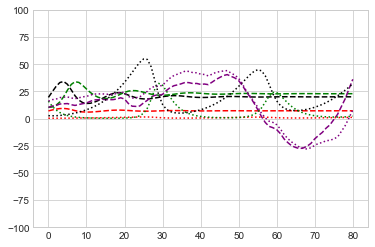

In [118]:
t = np.linspace(0, 80, 81)
fig = plt.figure()
ax = plt.axes()
ys_plots = {}
for i, sample in enumerate(samples_to_models_and_ys):
    linestyle = '--' if i % 2 == 0 else ':'
    ax.plot(t, np.array([x[0] for x in eval_data[sample]]), linestyle=linestyle, color='black')
    ax.plot(t, np.array([x[1] for x in eval_data[sample]]), linestyle=linestyle, color='red')
    ax.plot(t, np.array(eval_ys[sample]), linestyle=linestyle, color='green');
    ys_plots[sample] = ax.plot([], [], linestyle=linestyle, color='purple')
    ax.plot([0], [eval_starts[sample]], linestyle=linestyle, color='blue')
    ax.plot([80], [eval_ends[sample]], linestyle=linestyle, color='yellow')
    ax.set_ylim((-100, 100))
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(model_ys), interval=500, blit=True)
anim